In [1]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
reviews = pd.read_csv('reviews.csv')

In [3]:
games = pd.read_csv('ps4.csv')

In [4]:
games.shape

(1585, 13)

In [6]:
games.columns

Index(['title', 'page', 'critic_score', 'user_score', 'GID', 'publisher',
       'release_date', 'summary', 'rating', 'developer', 'genres', 'online',
       'num_credits'],
      dtype='object')

In [5]:
games.dtypes

title            object
page             object
critic_score      int64
user_score       object
GID               int64
publisher        object
release_date     object
summary          object
rating           object
developer        object
genres           object
online          float64
num_credits     float64
dtype: object

In [14]:
# Can't convert score to float without dropping tbd
(games.user_score =='tbd').sum()

147

In [13]:
games.isnull().sum()

title              0
page               0
critic_score       0
user_score         0
GID                0
publisher        558
release_date     558
summary          575
rating           596
developer        559
genres           558
online          1141
num_credits     1416
dtype: int64

In [15]:
games.rating.value_counts()

T       331
M       277
E10+    205
E       176
Name: rating, dtype: int64

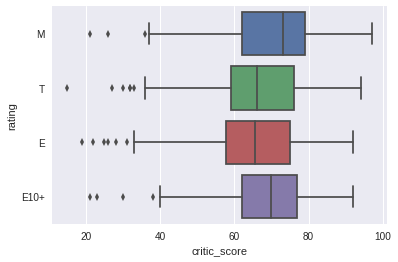

In [18]:
# The rating system goes E, E10+, T, M.
# There is a slight trend here
sns.boxplot(x = 'critic_score', y = 'rating', data = games)

In [55]:
len(games.critic_score.unique())

74

In [56]:
len(games.user_score.unique())

82

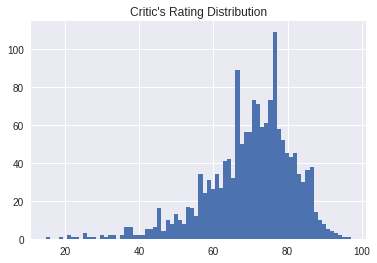

In [19]:
#plt.subplot(211)
plt.hist(games.critic_score, bins = 74)
plt.title("Critic's Rating Distribution");
# plt.subplot(212) # Can't do this until I get rid of 'tbd'
# plt.hist(games.user_score, bins=82)
# plt.title("User's Rating Distribution");

In [58]:
reviews.shape

(58091, 5)

In [59]:
reviews.dtypes

author    object
date      object
score      int64
blurb     object
GID        int64
dtype: object

In [61]:
len(reviews.GID.unique())

1307

In [68]:
 reviews.GID.value_counts()

997     2292
2       1883
484     1820
6       1661
8       1425
871     1318
32      1166
10      1065
862      957
1        923
1224     883
254      848
5        779
275      773
723      739
304      654
308      610
4        600
103      581
269      566
916      539
674      496
37       470
0        455
386      438
438      428
30       427
337      418
837      404
169      393
        ... 
1207       1
1251       1
1011       1
1347       1
530        1
433        1
465        1
964        1
900        1
1297       1
1329       1
612        1
580        1
516        1
466        1
452        1
626        1
755        1
324        1
260        1
196        1
850        1
946        1
1138       1
1234       1
1539       1
531        1
1443       1
659        1
1519       1
Name: GID, dtype: int64

In [27]:
games = games.join(reviews.groupby('GID').author.count(), on='GID')


In [25]:
games.rename(columns={'author': 'num_reviews'}, inplace=True)

In [26]:
games.head()

,title,page,critic_score,user_score,GID,publisher,release_date,summary,rating,developer,genres,online,num_credits,num_reviews
0,Grand Theft Auto V,/game/playstation-4/grand-theft-auto-v,97,8.3,0,Rockstar Games,"Nov 18, 2014",The sprawling sun-soaked metropolis of Los San...,M,Rockstar North,"Action Adventure,Modern,Open-World",0.0,16.0,455.0
1,The Last of Us Remastered,/game/playstation-4/the-last-of-us-remastered,95,9.1,1,SCEA,"Jul 29, 2014",The Last of Us has been rebuilt for the PlaySt...,M,Naughty Dog,"Action Adventure,General,Modern",0.0,24.0,923.0
2,God of War,/game/playstation-4/god-of-war,94,9.2,2,Sony Interactive Entertainment,"Apr 20, 2018",His vengeance against the gods of Olympus far ...,M,SCE Santa Monica,"Action Adventure,Linear",1.0,4.0,1883.0
3,XCOM 2: War of the Chosen,/game/playstation-4/xcom-2-war-of-the-chosen,94,6.2,3,2K Games,"Aug 29, 2017",XCOM 2: War of the Chosen adds extensive new c...,T,Firaxis Games,"Strategy,Turn-Based,Tactics",NaN,NaN,17.0
4,Persona 5,/game/playstation-4/persona-5,93,9.1,4,Atlus,"Apr 4, 2017",Beneath the veneer of typical urban high schoo...,M,Atlus,"Role-Playing,Japanese-Style",1.0,84.0,600.0


<Container object of 1585 artists>

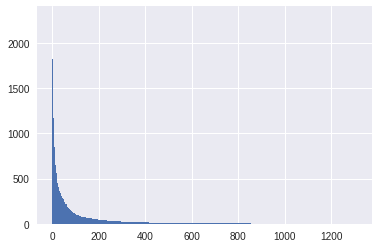

In [48]:
x = [i for i in range(games.shape[0])]
plt.bar(x, height=games.sort_values(by='num_reviews', ascending=False).num_reviews, width=1)


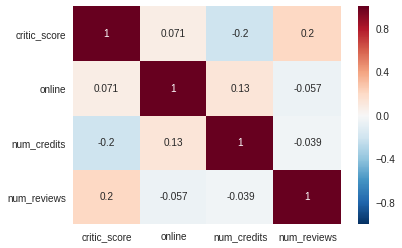

In [44]:
sns.heatmap(games.drop('GID', 1).corr(), annot=True)

In [58]:
games[games.num_reviews.isnull()].user_score

54      7.1
55      8.0
56      7.8
57      8.4
58      7.0
59      6.3
60      7.6
61      7.2
62      8.2
63      8.3
64      8.0
65      6.7
66      6.6
67      8.6
68      8.1
69      7.8
70      6.9
71      7.8
72      5.4
73      7.1
74      8.3
75      8.4
76      7.5
77      8.6
78      7.8
79      7.6
80      6.7
81      6.1
82      6.2
83      8.0
       ... 
1382    4.4
1386    1.5
1390    tbd
1398    tbd
1401    tbd
1405    4.9
1410    tbd
1420    tbd
1424    tbd
1432    5.3
1436    tbd
1441    tbd
1442    tbd
1444    4.6
1459    tbd
1469    6.7
1481    tbd
1484    6.4
1488    5.2
1489    tbd
1490    tbd
1500    5.4
1512    4.8
1516    tbd
1524    tbd
1526    tbd
1535    7.1
1542    7.0
1557    2.1
1577    2.1
Name: user_score, dtype: object

In [98]:
high_review_count = reviews.groupby('author').count()[reviews.groupby('author').GID.count() > 4].index

In [107]:
(reviews[reviews.author.isin(high_review_count)].GID.value_counts()>1).sum()

875

In [101]:
games.columns


Index(['title', 'page', 'critic_score', 'user_score', 'GID', 'publisher',
       'release_date', 'summary', 'rating', 'developer', 'genres', 'online',
       'num_credits', 'num_reviews'],
      dtype='object')